<a href="https://colab.research.google.com/github/Idowuilekura/hamoye_internship/blob/master/hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
hamoye_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

In [3]:
hamoye_dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
list_columns =list(hamoye_dataset.columns)
renamed_columns_list = ['date', 'Appliances', 'lights', 'temp_kitchen', 'humidity_kitchen', 'temp_liv_room', 'hum_liv_room', 'temp_laundry', 'hum_laundry', 'temp_office', 'hum_office', 'temp_bathroom', 'hum_bathroom', 'temp_outside', 'hum_outside', 'temp_ironing_room', 'hum_ironing_room', 'temp_teenager_room', 'hum_teenager_room', 'temp_parent_room', 'hum_parent_room', 'T_out', 'Press_mm_hg', 'hum_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'random_var_1', 'random_var_2']
#print(list_columns)
hamoye_dataset.columns = renamed_columns_list

['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [8]:
hamoye_dataset.head()

,date,Appliances,lights,temp_kitchen,humidity_kitchen,temp_liv_room,hum_liv_room,temp_laundry,hum_laundry,temp_office,hum_office,temp_bathroom,hum_bathroom,temp_outside,hum_outside,temp_ironing_room,hum_ironing_room,temp_teenager_room,hum_teenager_room,temp_parent_room,hum_parent_room,T_out,Press_mm_hg,hum_out,Windspeed,Visibility,Tdewpoint,random_var_1,random_var_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
hamoye_dataset.drop(['date','lights'],axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hamoye_dataset_scaled = pd.DataFrame(scaler.fit_transform(hamoye_dataset),columns=hamoye_dataset.columns)

In [13]:
hamoye_dataset_scaled.head()

,Appliances,temp_kitchen,humidity_kitchen,temp_liv_room,hum_liv_room,temp_laundry,hum_laundry,temp_office,hum_office,temp_bathroom,hum_bathroom,temp_outside,hum_outside,temp_ironing_room,hum_ironing_room,temp_teenager_room,hum_teenager_room,temp_parent_room,hum_parent_room,T_out,Press_mm_hg,hum_out,Windspeed,Visibility,Tdewpoint,random_var_1,random_var_2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [14]:
hamoye_feature_df = hamoye_dataset_scaled.drop('Appliances',axis=1)

In [15]:
hamoye_target_value = hamoye_dataset_scaled['Appliances']


In [16]:
simple_linear_reg_hamoye= hamoye_dataset_scaled[['humidity_kitchen','Appliances']].sample(20,random_state=2)

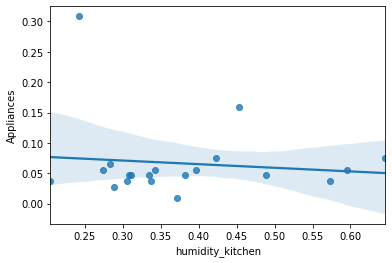

In [17]:
sns.regplot(x='humidity_kitchen',y='Appliances',data=simple_linear_reg_hamoye)

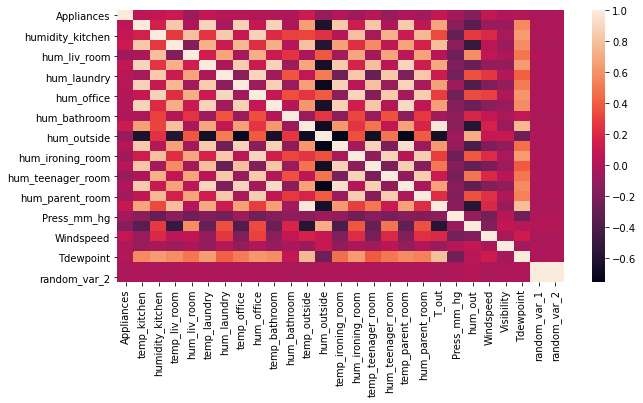

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(hamoye_dataset_scaled.corr())

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(hamoye_feature_df[['temp_liv_room']],hamoye_feature_df['temp_outside'],test_size=0.3,random_state=42)

In [40]:

train = linear_model.fit(x_train,y_train)
predict = linear_model.predict(x_test)
from sklearn.metrics import r2_score 
r2_score = r2_score(y_test,predict)
round(r2_score,2)

0.64

In [42]:
from sklearn.metrics import mean_absolute_error
mea = mean_absolute_error(y_test,predict)
round(mea,2)

0.08

In [44]:
rss = np.sum(np.square(y_test-predict))
round(rss,2)

66.12

In [45]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predict)
rmse= np.sqrt(mse)
round(rmse,3)

0.106

In [47]:
train.coef_

array([0.8910771])

In [59]:
def get_weights_df(model,feat,col_name):
  weights =pd.Series(model.coef_,feat.columns).sort_values()
  weights_df =pd.DataFrame(weights).reset_index()
  weights_df.columns =['Features',col_name]
  weights_df[col_name].round(3)
  return weights_df

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(hamoye_feature_df,hamoye_target_value,test_size=0.3,random_state=42)
new_linear_model = linear_model.fit(x_train,y_train)

In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
new_lasso_model = lasso.fit(x_train,y_train)

In [77]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(lasso.predict(x_test),y_test)
round(np.sqrt(mse))

0.0

In [76]:

lassor_model_weights = get_weights_df(new_lasso_model,x_train,'Lasso_model_weight')
lassor_model_weights

,Features,Lasso_model_weight
0,hum_out,-0.049557
1,hum_teenager_room,-0.000110
2,temp_kitchen,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,hum_parent_room,-0.000000
8,temp_parent_room,-0.000000
9,temp_teenager_room,0.000000


In [71]:
linear_model_weights = get_weights_df(new_linear_model,x_train,'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,hum_liv_room,-0.456698
1,T_out,-0.321860
2,temp_liv_room,-0.236178
3,temp_parent_room,-0.189941
4,hum_teenager_room,-0.157595
5,hum_out,-0.077671
6,hum_ironing_room,-0.044614
7,hum_parent_room,-0.039800
8,temp_bathroom,-0.015657
9,temp_kitchen,-0.003281


In [57]:
from sklearn.linear_model import Ridge
rigde = Ridge(alpha=0.4)
train_rigde = rigde.fit(x_train,y_train)
predict_ridge = rigde.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predict_ridge)
rmse = np.sqrt(mse)
round(rmse,3)


0.106

In [58]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
train_lasso = lasso.fit(x_train,y_train)
predict_lasso = lasso.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predict_lasso)
rmse = np.sqrt(mse)
round(rmse,3)

0.123

In [25]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_train = linear_model.fit(x_train,y_train)
linear_predict = linear_model.predict(x_test)

In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,linear_predict)
round(mae,3,)

0.05

In [30]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,linear_predict)
r2_score

0.14890246319303535